In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [2]:
# Création d'un dataframe à partir de la base de données
new_df=pd.read_excel('data/BDTotal-Test.xlsx', usecols=lambda col: not col.startswith("Unnamed"))

In [3]:
# Création d'un dataframe à partir de la base de données
cities=pd.read_csv('data/cities.csv')

In [4]:
# Permet de mettre tous les code postaux en chaine de caractere
cities['zip_code']=cities['zip_code'].astype(str)

In [6]:
# Créer une colonne "Régions" dans le new_df à partir de la base de donnée cities
new_df['Regions'] = new_df['Code_Postale_Habitation'].apply(
    lambda x: cities.loc[cities['zip_code'].astype(str) == str(x), 'region_name'].values[0]
    if str(x) in cities['zip_code'].astype(str).unique() else np.nan)

# Supprime l'étudiant qui vient de guadeloupe qui nous gène pour la représentation graphique.

new_df = new_df[
    (new_df['Longitude_ville_habitation'] > -5) & (new_df['Longitude_ville_habitation'] < 10) &
    (new_df['Latitude_ville_habitation'] > 40) & (new_df['Latitude_ville_habitation'] < 52)]

# Charger les données GeoJSON des régions françaises
regions_gdf = gpd.read_file('data/regions-version-simplifiee.geojson')



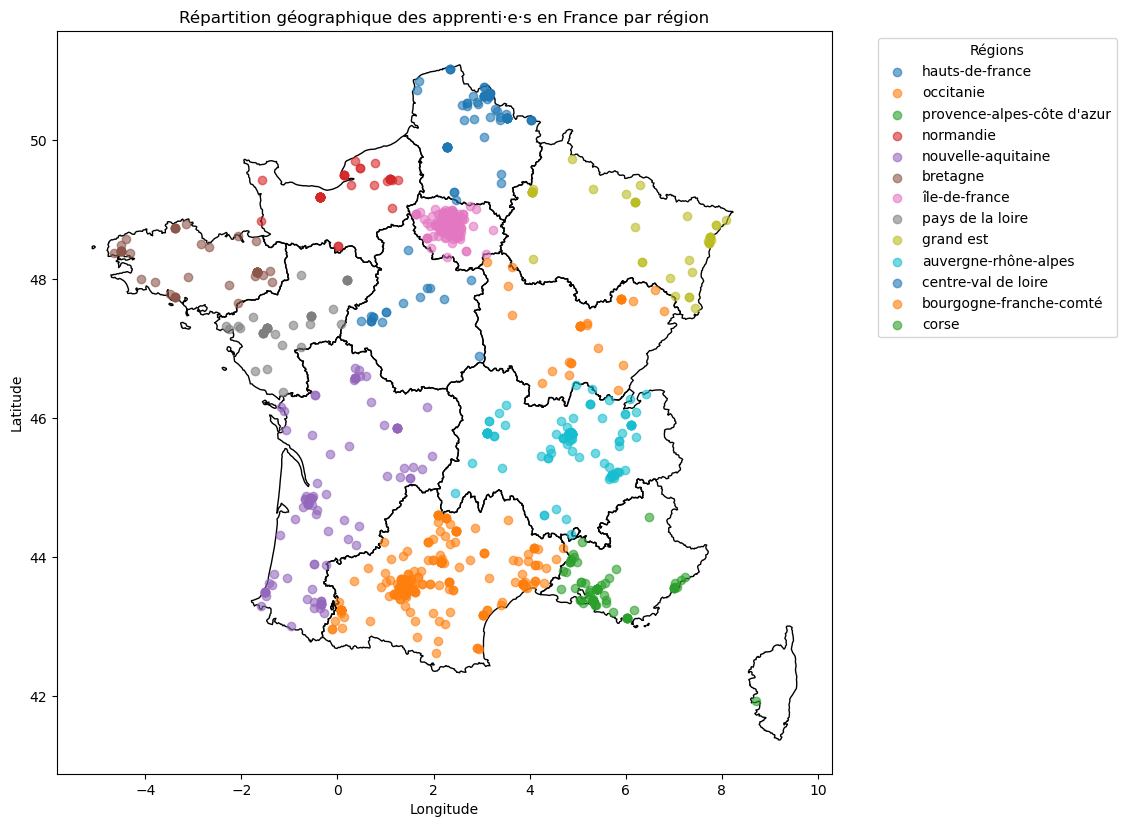

In [7]:

# Créer une figure
fig, ax = plt.subplots(figsize=(10, 10))

# Tracer les contours des régions
regions_gdf.plot(ax=ax, color='none', edgecolor='black')

# Tracer les points des apprenti·e·s, colorés par région
for region in new_df['Regions'].unique():
    region_data = new_df[new_df['Regions'] == region]
    ax.scatter(
        region_data['Longitude_ville_habitation'],
        region_data['Latitude_ville_habitation'],
        label=region,
        alpha=0.6
    )

# Ajouter une légende
plt.legend(title='Régions', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajouter des titres et des labels
plt.title('Répartition géographique des apprenti·e·s en France par région')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Afficher la carte
plt.show()


In [8]:
# Identifier les colonnes liées aux formations de Mines Albi
colonnes_albi = [
    'Formation_IMT_Mines_Albi_SENMBA',
    'Formation_IMT_Mines_Albi_SIMMA',
    'Formation_IMT_Mines_Albi_SIPHASS',
    'Formation_IMT_Mines_Albi_DD_Parma_Alternant',
    'Formation_IMT_Mines_Albi_DD_Parma_Etudiant'
]

# Ajouter une colonne indiquant l'admission pour toutes les données (admis à Mines Albi)
new_df['Admis_Mines_Albi'] = new_df[colonnes_albi].eq('Admis').any(axis=1)

# Ajouter une colonne en fonction des distances à albi
new_df['Distance_Categorie'] = pd.cut(
    new_df['Distance_Albi_km'],
    bins=[0, 100, 300, 500, 1000, np.inf],
    labels=['<100km', '100-300km', '300-500km', '500-1000km', '>1000km']
)

# Calcul de la proportion d'admis pour chaque catégorie de distance
taux_admis_distance = new_df.groupby('Distance_Categorie')['Admis_Mines_Albi'].mean().reset_index()
taux_admis_distance.columns = ['Distance_Categorie', 'Taux_Admis']

# Calcul de la proportion d'admis pour chaque région
taux_admis_region = new_df.groupby('Regions')['Admis_Mines_Albi'].mean().reset_index()
taux_admis_region.columns = ['Region', 'Taux_Admis']

# Filtrer les étudiants admis dans une des formations de Mines Albi
admis_albi = new_df[new_df['Admis_Mines_Albi']]

C:\Users\oussama\AppData\Local\Temp\ipykernel_22524\2808623348.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taux_admis_distance = new_df.groupby('Distance_Categorie')['Admis_Mines_Albi'].mean().reset_index()


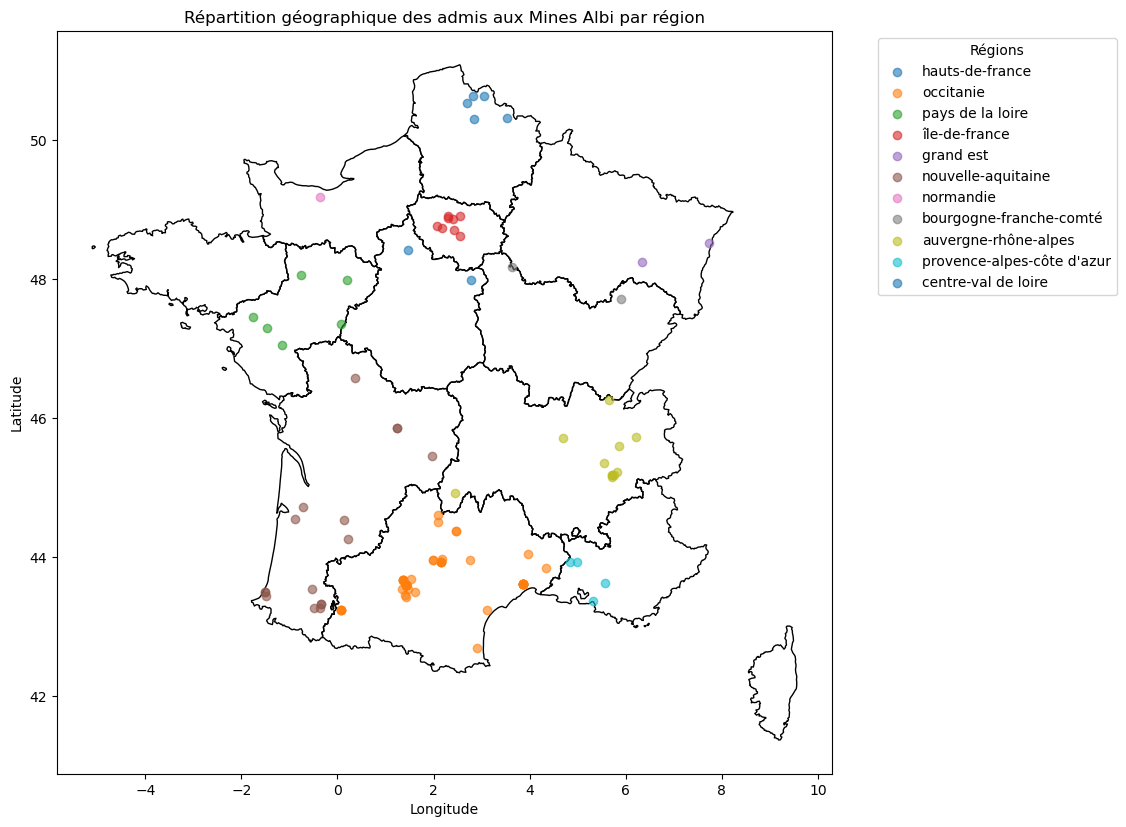

In [9]:
# Créer une figure
fig, ax = plt.subplots(figsize=(10, 10))

# Tracer les contours des régions
regions_gdf.plot(ax=ax, color='none', edgecolor='black')

# Tracer les points des apprenti·e·s, colorés par région
for region in admis_albi['Regions'].unique():
    region_data = admis_albi[admis_albi['Regions'] == region]
    ax.scatter(
        region_data['Longitude_ville_habitation'],
        region_data['Latitude_ville_habitation'],
        label=region,
        alpha=0.6
    )

# Ajouter une légende
plt.legend(title='Régions', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajouter des titres et des labels
plt.title('Répartition géographique des admis aux Mines Albi par région')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Afficher la carte
plt.show()


C:\Users\oussama\AppData\Local\Temp\ipykernel_22524\3751962985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admis_albi['Distance_Category'] = pd.cut(


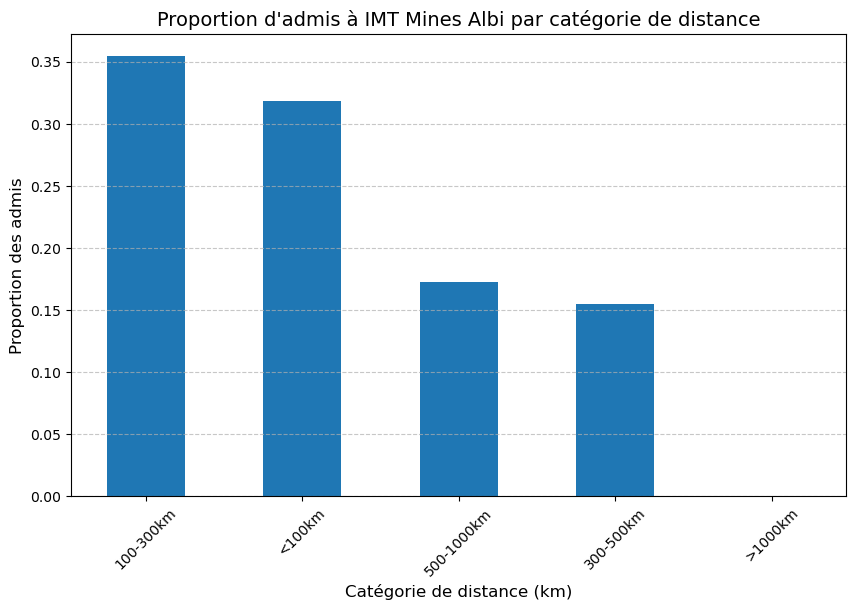

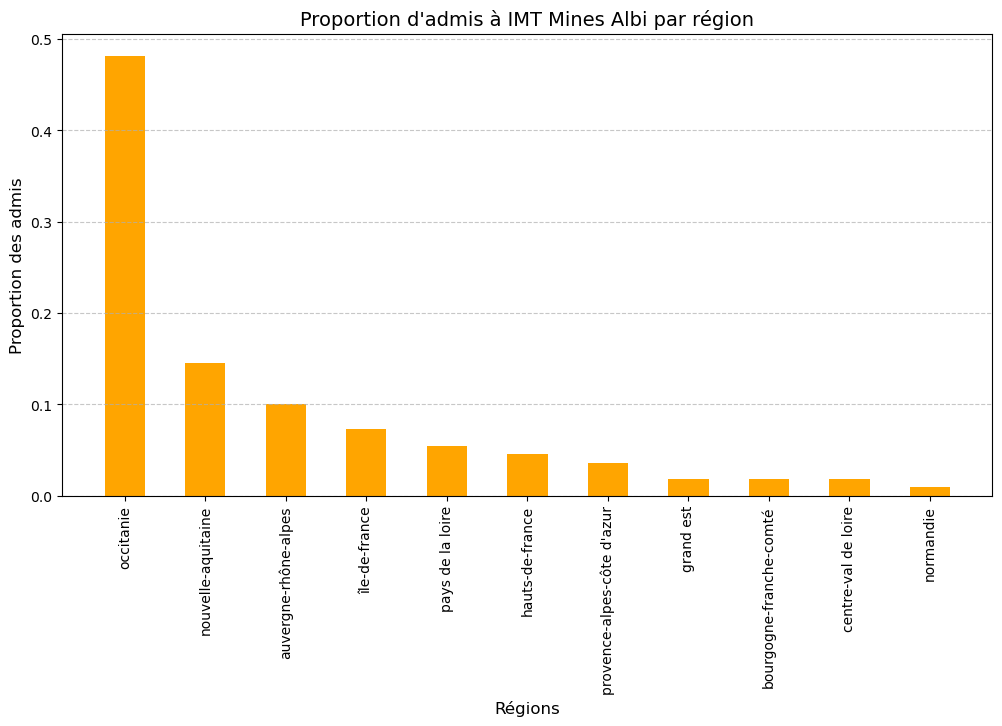

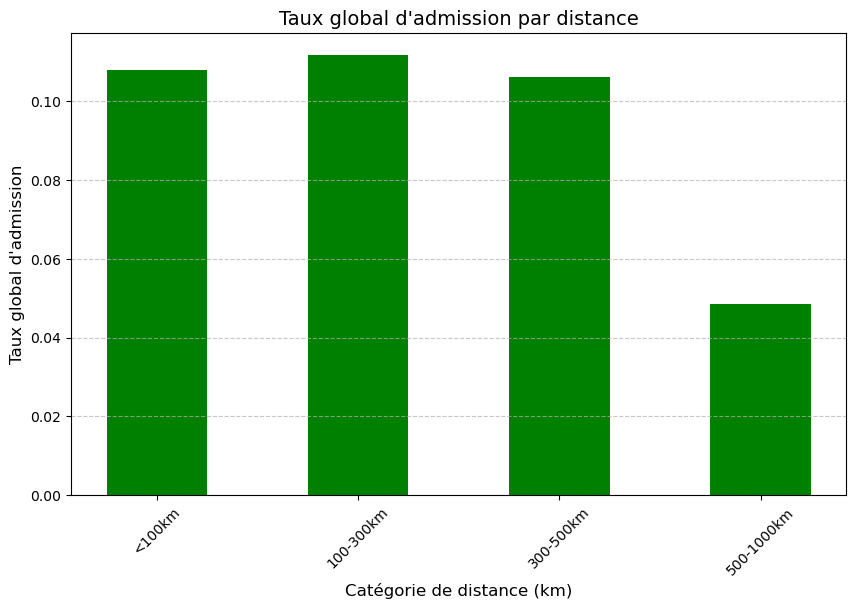

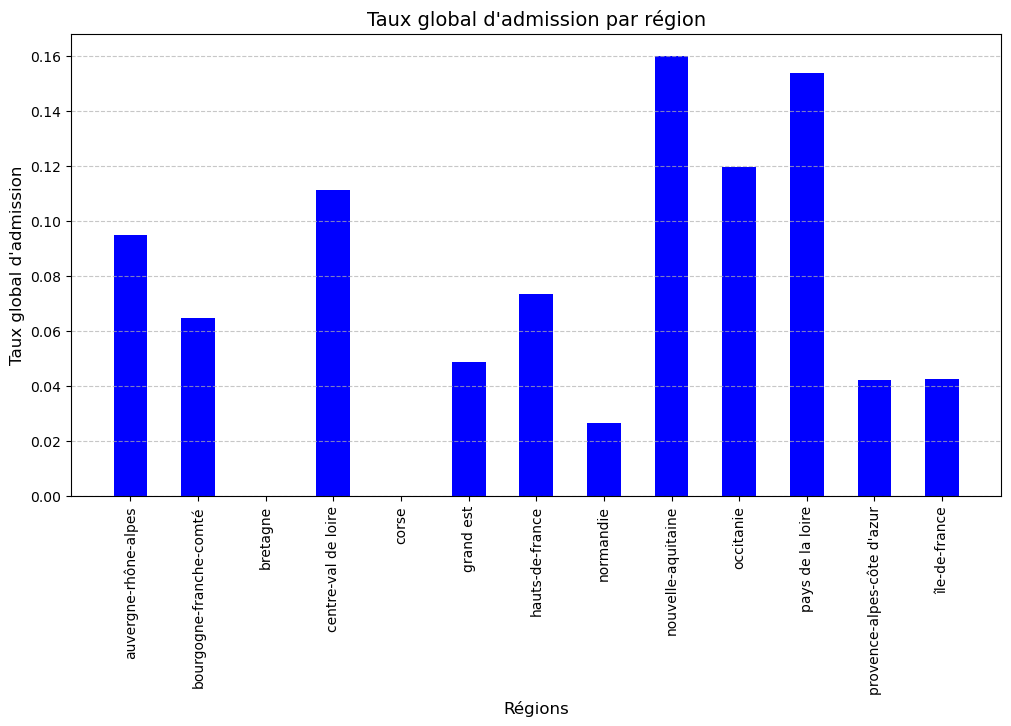

In [10]:
# 1. Calculer le taux d'admission par catégorie de distance (pour les admis uniquement)
admis_albi['Distance_Category'] = pd.cut(
    admis_albi['Distance_Albi_km'],
    bins=[0, 100, 300, 500, 1000, np.inf],
    labels=['<100km', '100-300km', '300-500km', '500-1000km', '>1000km']
)

taux_admission_distance = admis_albi['Distance_Category'].value_counts(normalize=True).reset_index()
taux_admission_distance.columns = ['Distance_Category', 'Proportion_Admis']

# 2. Calculer le taux d'admission par région (pour les admis uniquement)
taux_admission_region = admis_albi['Regions'].value_counts(normalize=True).reset_index()
taux_admission_region.columns = ['Region', 'Proportion_Admis']

# Visualisation des taux d'admission par distance
plt.figure(figsize=(10, 6))
plt.bar(taux_admission_distance['Distance_Category'], taux_admission_distance['Proportion_Admis'], width=0.5)
plt.title("Proportion d'admis à IMT Mines Albi par catégorie de distance", fontsize=14)
plt.xlabel("Catégorie de distance (km)", fontsize=12)
plt.ylabel("Proportion des admis", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisation des taux d'admission par région
plt.figure(figsize=(12, 6))
plt.bar(taux_admission_region['Region'], taux_admission_region['Proportion_Admis'], width=0.5, color='orange')
plt.title("Proportion d'admis à IMT Mines Albi par région", fontsize=14)
plt.xlabel("Régions", fontsize=12)
plt.ylabel("Proportion des admis", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisation des proportions globales d'admis par distance
plt.figure(figsize=(10, 6))
plt.bar(taux_admis_distance['Distance_Categorie'], taux_admis_distance['Taux_Admis'], width=0.5, color='green')
plt.title("Taux global d'admission par distance", fontsize=14)
plt.xlabel("Catégorie de distance (km)", fontsize=12)
plt.ylabel("Taux global d'admission", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisation des proportions globales d'admis par région
plt.figure(figsize=(12, 6))
plt.bar(taux_admis_region['Region'], taux_admis_region['Taux_Admis'], width=0.5, color='blue')
plt.title("Taux global d'admission par région", fontsize=14)
plt.xlabel("Régions", fontsize=12)
plt.ylabel("Taux global d'admission", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

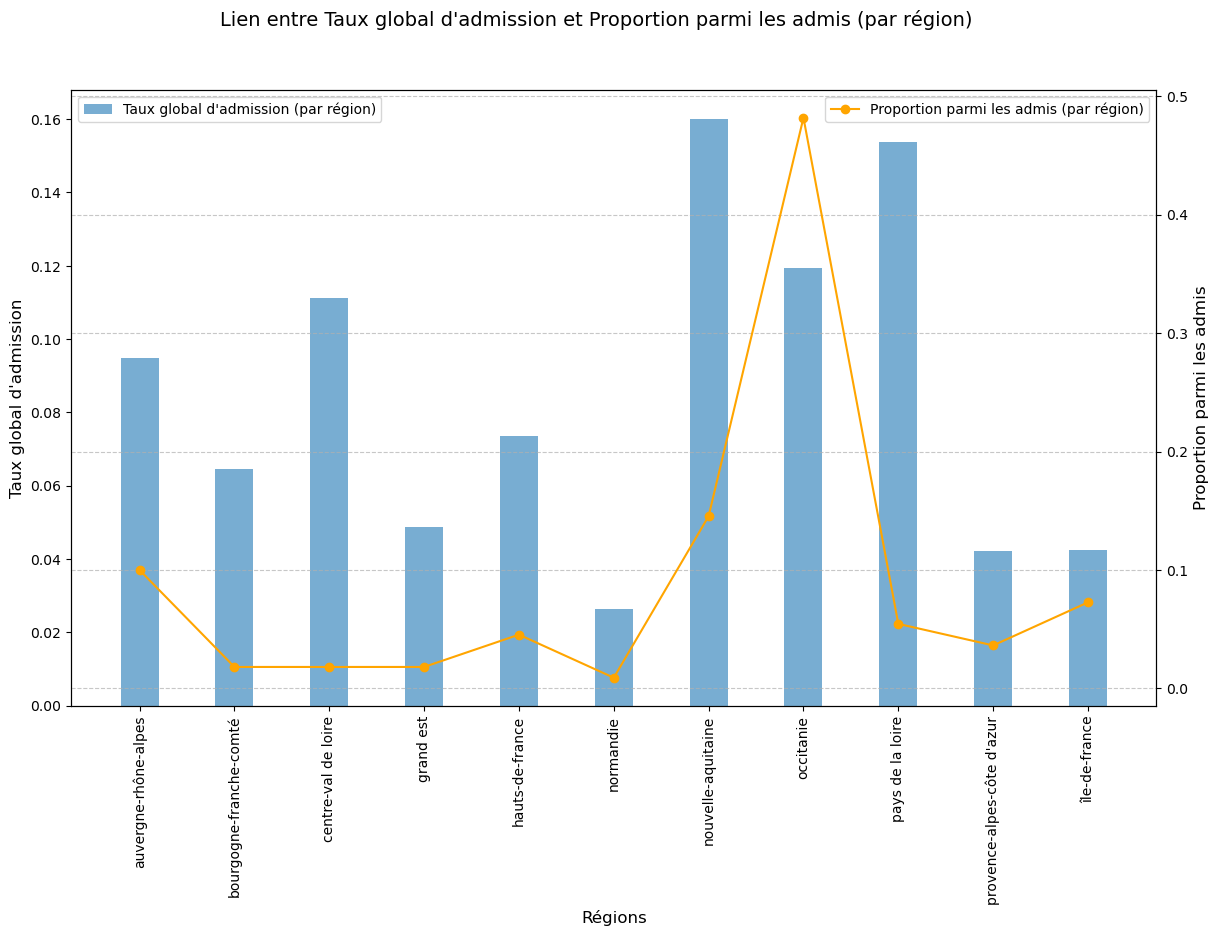

In [11]:
# Fusionner les données sur les régions
regions_combined = pd.merge(
    taux_admis_region,
    taux_admission_region,
    on='Region',
    suffixes=('_Global', '_Admis')
)

# Création du graphique combiné
fig, ax1 = plt.subplots(figsize=(14, 8))

# Barres pour les proportions globales par région
ax1.bar(regions_combined['Region'], regions_combined['Taux_Admis'], width=0.4, label="Taux global d'admission (par région)", alpha=0.6)
ax1.set_ylabel("Taux global d'admission", fontsize=12)
ax1.set_xlabel("Régions", fontsize=12)
ax1.set_xticks(range(len(regions_combined['Region'])))
ax1.set_xticklabels(regions_combined['Region'], rotation=90)

# Ligne pour les proportions parmi les admis
ax2 = ax1.twinx()
ax2.plot(range(len(regions_combined['Region'])), regions_combined['Proportion_Admis'], label="Proportion parmi les admis (par région)", color='orange', marker='o')
ax2.set_ylabel("Proportion parmi les admis", fontsize=12)

# Ajouter des légendes et un titre
fig.suptitle("Lien entre Taux global d'admission et Proportion parmi les admis (par région)", fontsize=14)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [12]:
new_df.to_excel('data/DATA_Question3.xlsx')